# Import of libraries and Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score


In [2]:
df = pd.read_csv("AER_credit_card_data.csv")

# Data exploration

In [3]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [4]:
df.shape

(1319, 12)

In [5]:
df.card = (df.card == "yes").astype(int)

In [6]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


# Data preparation

In [7]:
df_class = df.copy()

array([[<AxesSubplot:title={'center':'card'}>,
        <AxesSubplot:title={'center':'reports'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'share'}>,
        <AxesSubplot:title={'center':'expenditure'}>],
       [<AxesSubplot:title={'center':'dependents'}>,
        <AxesSubplot:title={'center':'months'}>,
        <AxesSubplot:title={'center':'majorcards'}>],
       [<AxesSubplot:title={'center':'active'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

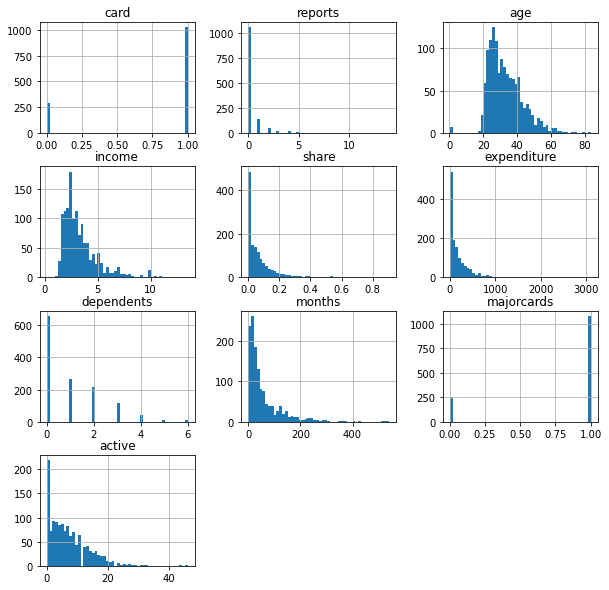

In [8]:
df_class.hist(bins=50, figsize = (10,10))

In [9]:
df_full_train, df_test = train_test_split(df_class, test_size=0.2, random_state= 1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state= 1)

df_train= df_train.reset_index(drop =True)
df_val= df_val.reset_index(drop =True)
df_test= df_test.reset_index(drop =True)

y_train = df_train.card.values
y_val = df_val.card.values
y_test = df_test.card.values

del df_train ["card"]
del df_val ["card"]
del df_test["card"]


In [10]:
len(df_train), len(df_val),  len(df_test)

(791, 264, 264)

In [11]:
df_train.head()

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,3,40.50000,4.0128,0.000299,0.00000,no,no,1,12,1,17
1,1,32.33333,6.0000,0.000200,0.00000,yes,no,4,18,1,4
2,1,29.16667,2.2000,0.038205,69.79333,no,no,0,49,1,7
3,1,54.66667,7.2900,0.106536,647.20670,yes,no,2,78,1,9
4,0,25.00000,3.3984,0.000353,0.00000,yes,no,2,29,0,4


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   reports      791 non-null    int64  
 1   age          791 non-null    float64
 2   income       791 non-null    float64
 3   share        791 non-null    float64
 4   expenditure  791 non-null    float64
 5   owner        791 non-null    object 
 6   selfemp      791 non-null    object 
 7   dependents   791 non-null    int64  
 8   months       791 non-null    int64  
 9   majorcards   791 non-null    int64  
 10  active       791 non-null    int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 68.1+ KB


In [13]:
numerical = list(df_train.select_dtypes('number').columns)
categorical = list(df_train.select_dtypes(include=['object']).columns)

# Question 1

In [19]:
roc_auc_score( df_full_train["card"], df_full_train.age )

0.4956469038208169

In [18]:
df_full_train.card

710     0
1258    1
435     1
987     0
1286    1
       ..
715     1
905     1
1096    1
235     1
1061    1
Name: card, Length: 1055, dtype: int32

In [20]:
auc_scores = []

for column in numerical:
    auc_score = roc_auc_score( df_full_train["card"], df_full_train[column] )
    auc_scores.append(auc_score)
    print(column, auc_score)

reports 0.2837523056653492
age 0.4956469038208169
income 0.5841080368906456
share 0.9881870882740447
expenditure 0.989090909090909
dependents 0.48205533596837946
months 0.4791725955204216
majorcards 0.5408827404479579
active 0.5913043478260869


# Question 2

In [31]:
dv = DictVectorizer(sparse = False)

train_dicts = df_train[categorical + numerical].to_dict(orient = "records")
X_train = dv.fit_transform(train_dicts)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

val_dict = df_val[categorical + numerical].to_dict(orient = "records")
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]

## calculating roc_score
roc_score = roc_auc_score(y_val, y_pred).round(3)
roc_score

0.995